In [ ]:
pip install split-folders

In [1]:
from tensorflow import keras
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import Dense,Dropout, GlobalAveragePooling2D,Conv2D, MaxPooling2D, MaxPool2D,Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import json
from keras import regularizers
from google.colab import files
import h5py
import pickle
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
%matplotlib inline
import pandas as pd
import cv2
import os
import shutil
#import splitfolders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_save = '/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/Anulata'
if os.path.isdir(root_save) == 1:
  print ('done')
else:
  print('False')

done


Buat folder class

In [ ]:
url = '/content/drive/MyDrive/MODEL DL HOYA/DATA/MENTAH_CROP/'
dirlist = os.listdir(url)
for dir in dirlist : #ada

  try :
      os.makedirs('/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/'+dir, exist_ok = True)
  except OSError as error:
    print("Directory '%s' can not be created" %dir)

**RESIZE CITRA**

In [ ]:
root = '/content/drive/MyDrive/HOYA/DAUN20/B/'
root_save = '/content/drive/MyDrive/HOYA/DAUN20/'
os.path.isdir(root_save)
list_dir = os.listdir(root) # your directory path
print(list_dir)
for dir in list_dir : #ada
  if os.path.isdir(root_save+dir)== 0:
    try :
      os.makedirs(root_save+dir, exist_ok = True)
    except OSError as error:
      print("Directory '%s' can not be created" %dir)
  list_file = os.listdir(root + dir + '/') # your directory path
  print(list_file)
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    print(url)
    img = cv2.imread(url, cv2.IMREAD_UNCHANGED)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('Original Dimensions : ',img.shape)

    scale_percentx = 150/img.shape[0]
    scale_percenty = 150/img.shape[1] # percent of original size
    width = round(RGB_img.shape[0] * scale_percentx)
    height = round(RGB_img.shape[1] * scale_percenty)
    dim = (width, height)

      # resize image
    resized = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
    url_save = root_save + dir + os.sep + file_name
      #print('url_save',url_save)
    cv2.imwrite(url_save, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    print('resize Dimensions : ',resized.shape)


In [3]:
image_size = 150
batch_size = 32

Jumlah Data

In [ ]:
url = '/content/drive/MyDrive/HOYA/DAUN20/DATA'
list_dir = os.listdir(url)
list_dir.sort()
Total=0
for dir in list_dir:
  print(dir)
  listfile = os.listdir(url+'/'+dir)
  print(len(listfile))
  Total = Total+len(listfile)
  #for f in listfile:
  #  n = os.listdir(url+dir+'/'+f)
print(Total)

Amicabilis
22
Anulata
21
Australis
29
Callistophylla
29
Dolichosparte
29
Garut 1
20
Gunung Lawu Lumajang
24
Hypolasia
23
Incurvula
25
Mamasa
32
Minahassae
28
Monetteae
35
Obovata
24
Polypus
25
Polypus kalteng
22
Rigidifolia
21
Surisana
21
Towutiensis
41
Unchinata
33
Vitellina
26
Vittelinoides
34
Walicii ssp Tenebrosa
21
campanulata white
35
caudata
25
occultata silver
21
waymaniae
35
701


In [ ]:
splitfolders.ratio("/content/drive/MyDrive/HOYA/DAUN20/DATA", # The location of dataset
                   output="/content/drive/MyDrive/HOYA/DAUN20/train/", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )


Copying files: 0 files [00:00, ? files/s]
Copying files: 9 files [00:00, 71.17 files/s]
Copying files: 19 files [00:00, 82.86 files/s]
Copying files: 28 files [00:00, 74.19 files/s]
Copying files: 39 files [00:00, 84.59 files/s]
Copying files: 48 files [00:00, 81.79 files/s]
Copying files: 57 files [00:00, 83.69 files/s]
Copying files: 66 files [00:00, 59.90 files/s]
Copying files: 73 files [00:02, 17.73 files/s]
Copying files: 78 files [00:03, 11.85 files/s]
Copying files: 82 files [00:04,  8.69 files/s]
Copying files: 85 files [00:04,  7.86 files/s]
Copying files: 87 files [00:05,  7.25 files/s]
Copying files: 89 files [00:05,  6.93 files/s]
Copying files: 91 files [00:05,  6.63 files/s]
Copying files: 93 files [00:06,  6.09 files/s]
Copying files: 94 files [00:06,  5.16 files/s]
Copying files: 95 files [00:06,  5.04 files/s]
Copying files: 96 files [00:07,  4.77 files/s]
Copying files: 97 files [00:07,  3.88 files/s]
Copying files: 98 files [00:07,  3.50 files/s]
Copying files: 99 

In [4]:
url = "/content/drive/MyDrive/HOYA/DAUN20/train/"
list_dir = os.listdir(url)
#print(len(list_dir))
for dir in list_dir :
  listtrain = os.listdir(url+dir)
  print(dir + "==========")
  sum = 0
  for list_file in listtrain:
    print(list_file+" = ")
    f = os.listdir(url+dir+'/'+list_file)
    print(len(f))
    sum = sum+len(f)
  print('total = ',sum)


train==========
caudata = 
17
Gunung Lawu Lumajang = 
16
Surisana = 
14
Walicii ssp Tenebrosa = 
14
Callistophylla = 
20
Vittelinoides = 
23
Dolichosparte = 
20
Hypolasia = 
16
waymaniae = 
24
Towutiensis = 
28
Australis = 
20
Amicabilis = 
15
Polypus = 
17
Minahassae = 
19
Incurvula = 
17
Rigidifolia = 
14
campanulata white = 
24
Polypus kalteng = 
15
Obovata = 
16
Mamasa = 
22
Vitellina = 
18
Unchinata = 
23
occultata silver = 
14
Anulata = 
14
Monetteae = 
24
Garut 1 = 
14
total =  478
val==========
caudata = 
5
Gunung Lawu Lumajang = 
4
Surisana = 
4
Walicii ssp Tenebrosa = 
4
Callistophylla = 
5
Vittelinoides = 
6
Dolichosparte = 
5
Hypolasia = 
4
waymaniae = 
7
Towutiensis = 
8
Australis = 
5
Amicabilis = 
4
Polypus = 
5
Minahassae = 
5
Incurvula = 
5
Rigidifolia = 
4
campanulata white = 
7
Polypus kalteng = 
4
Obovata = 
4
Mamasa = 
6
Vitellina = 
5
Unchinata = 
6
occultata silver = 
4
Anulata = 
4
Monetteae = 
7
Garut 1 = 
4
total =  131
test==========
caudata = 
3
Gunung Lawu 

In [4]:
# folders with train dir & val dir
train_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/train'
val_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/val'
test_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
#
input_shape = (image_size, image_size, 3)


augmented data

In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.05,
                              width_shift_range=0.2,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.2)

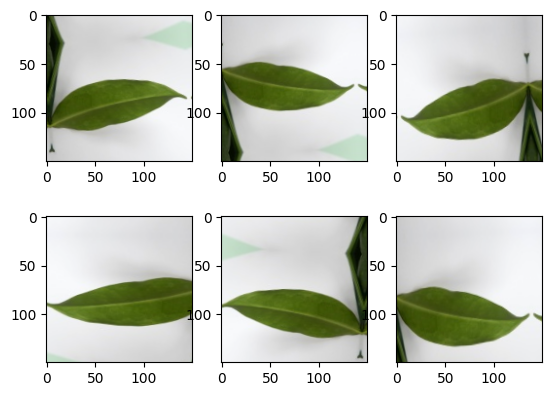

In [ ]:
root = '/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN10/DATA/'
os.path.isdir(root)
list_dir = os.listdir(root) # your directory path
list_dir[1]
for dir in list_dir : #ada
  list_file = os.listdir(root + dir + '/') # your directory path
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    img = image.load_img(url, target_size=(image_size, image_size))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 1
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(2,3,i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 7 == 0:
            break
    break;

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 478 images belonging to 26 classes.


In [7]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 131 images belonging to 26 classes.


In [ ]:
val_generator.class_indices

{'Amicabilis': 0,
 'Anulata': 1,
 'Australis': 2,
 'Callistophylla': 3,
 'Dolichosparte': 4,
 'Garut 1': 5,
 'Gunung Lawu Lumajang': 6,
 'Hypolasia': 7,
 'Incurvula': 8,
 'Mamasa': 9,
 'Minahassae': 10,
 'Monetteae': 11,
 'Obovata': 12,
 'Polypus': 13,
 'Polypus kalteng': 14,
 'Rigidifolia': 15,
 'Surisana': 16,
 'Towutiensis': 17,
 'Unchinata': 18,
 'Vitellina': 19,
 'Vittelinoides': 20,
 'Walicii ssp Tenebrosa': 21,
 'campanulata white': 22,
 'caudata': 23,
 'occultata silver': 24,
 'waymaniae': 25}

In [8]:
#optional
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 92 images belonging to 26 classes.


In [ ]:
base_model169.output

<KerasTensor: shape=(None, None, None, 1664) dtype=float32 (created by layer 'relu')>

In [ ]:
classes_num = 26 #numberclass we have
validation_steps = 100

In [9]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [10]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [14]:
input_shape = (150, 150, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=26

n_steps = train_generator.samples // batch_size
n_val_steps = val_generator.samples // batch_size
n_epochs = 100

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)

In [16]:
#from livelossplot.inputs.keras import PlotLossesCallback

#plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='/content/drive/MyDrive/HOYA/drivetl_modeldaunvgg16_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [13]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [17]:
%%time

vgg_history = vgg_model.fit(train_generator,
                            batch_size=batch_size,
                            epochs=n_epochs,
                            validation_data=val_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop],
                            verbose=1)

Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 3.0577 - accuracy: 0.1614
Epoch 1: val_loss improved from inf to 3.08835, saving model to /content/drive/MyDrive/HOYA/drivetl_modeldaunvgg16_v1.weights.best.hdf5
14/14 [==============================] - 198s 14s/step - loss: 3.0577 - accuracy: 0.1614 - val_loss: 3.0883 - val_accuracy: 0.1719
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 1.9785 - accuracy: 0.4574
Epoch 2: val_loss did not improve from 3.08835
14/14 [==============================] - 181s 13s/step - loss: 1.9785 - accuracy: 0.4574 - val_loss: 3.2159 - val_accuracy: 0.1484
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 1.2758 - accuracy: 0.6457
Epoch 3: val_loss improved from 3.08835 to 2.69196, saving model to /content/drive/MyDrive/HOYA/drivetl_modeldaunvgg16_v1.weights.best.hdf5
14/14 [==============================] - 183s 13s/step - loss: 1.2758 - accuracy: 0.6457 - val_loss: 2.6920 - val_accuracy: 0.3438

TESTING MODEL

In [ ]:
cls_val = val_generator.classes
cls_test = test_generator.classes
val_labels=np.array(cls_val)
test_labels=np.array(cls_test)
print(val_labels)
print(test_labels)

[ 0  0  0  0  1  1  1  1  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5
  5  6  6  6  6  7  7  7  7  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10
 10 11 11 11 11 11 11 11 12 12 12 12 13 13 13 13 13 14 14 14 14 15 15 15
 15 16 16 16 16 17 17 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 24 24
 24 24 25 25 25 25 25 25 25]
[ 0  0  0  1  1  1  2  2  3  3  3  3  4  4  4  4  5  5  6  6  6  6  7  7
  7  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12 12 13 13 13 14
 14 14 15 15 15 16 16 16 17 17 17 17 17 18 18 18 18 19 19 19 20 20 20 20
 20 21 21 21 22 22 22 22 23 23 23 24 24 24 25 25 25 25]


MODEL IDENTIFICATION

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


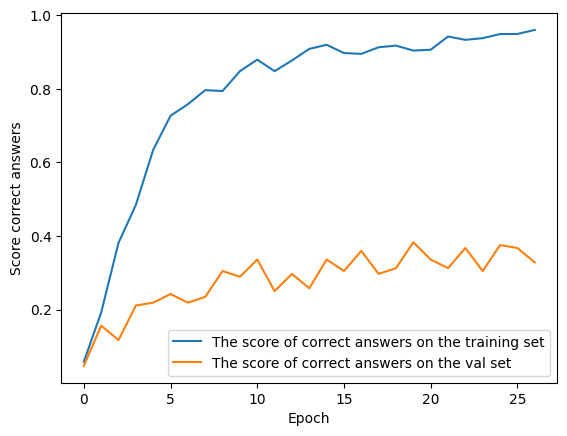

In [ ]:
plt.plot(vgg_history.history['accuracy'], label='The score of correct answers on the training set')
plt.plot(vgg_history.history['val_accuracy'], label='The score of correct answers on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score correct answers')
plt.legend()
plt.show()

In [ ]:
# Generate predictions
vgg_model.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

3/3 [==============================] - 30s 11s/step


In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/tl_model_v1.bunga.weights.best.hdf5')
#model.save('/content/drive/MyDrive/PENGENALAN POLA/arsiktektur_densenet121.h5')
new_model.summary()

Predict

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    print(url_img)
    img = image.load_img(url_img, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.show()
    break;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
class_names=val_generator.class_indices
print(class_names)

{'Amicabilis': 0, 'Anulata': 1, 'Australis': 2, 'Callistophylla': 3, 'Dolichosparte': 4, 'Garut 1': 5, 'Gunung Lawu Lumajang': 6, 'Hypolasia': 7, 'Incurvula': 8, 'Mamasa': 9, 'Minahassae': 10, 'Monetteae': 11, 'Obovata': 12, 'Polypus': 13, 'Polypus kalteng': 14, 'Rigidifolia': 15, 'Surisana': 16, 'Towutiensis': 17, 'Unchinata': 18, 'Vitellina': 19, 'Vittelinoides': 20, 'Walicii ssp Tenebrosa': 21, 'campanulata white': 22, 'caudata': 23, 'occultata silver': 24, 'waymaniae': 25}


In [ ]:
akurasi = 0
y_pred = np.array([])
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    img = image.load_img(url_img, target_size=(image_size, image_size))
    img_array = image.img_to_array(img)
    img_array /= 255
    img_test= np.expand_dims(img_array, axis=0)
    result = vgg_model.predict(img_test)
    hasil=np.argmax(result,axis=1)
    y_pred = np.append(y_pred, int(hasil))
    cls = dir_class[int(hasil)]

    print ([f+ ' prediksi ' + cls])
    if f == cls:
      akurasi +=1
print('Akurasi = ', akurasi/92)

1/1 [==============================] - 0s 417ms/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 261ms/step
['Amicabilis prediksi campanulata white']
1/1 [==============================] - 0s 260ms/step
['Amicabilis prediksi Anulata']
1/1 [==============================] - 0s 252ms/step
['Anulata prediksi Vitellina']
1/1 [==============================] - 0s 280ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 258ms/step
['Anulata prediksi Dolichosparte']
1/1 [==============================] - 0s 260ms/step
['Australis prediksi Dolichosparte']
1/1 [==============================] - 0s 282ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 254ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 259ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 290ms/step
['Callistophylla prediksi Callistophylla']
1/1 [=============================

In [ ]:
prediction = new_model.predict(test_generator)

3/3 [==============================] - 15s 3s/step


In [ ]:
STEP_SIZE_TEST = test_generator.batch_size
score = vgg_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)
print ("%s: %.2f%%" % (vgg_model.metrics_names[1], score[1]*100))

<ipython-input-49-0f6508251b0c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = vgg_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)


accuracy: 43.48%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support

In [ ]:
y_test = test_generator.classes

print(confusion_matrix(y_test, y_pred))

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0]
 [1 0 0 0 

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
test_label=np.array([])
for f in dir_class:
  test_label = np.append(test_label, f)

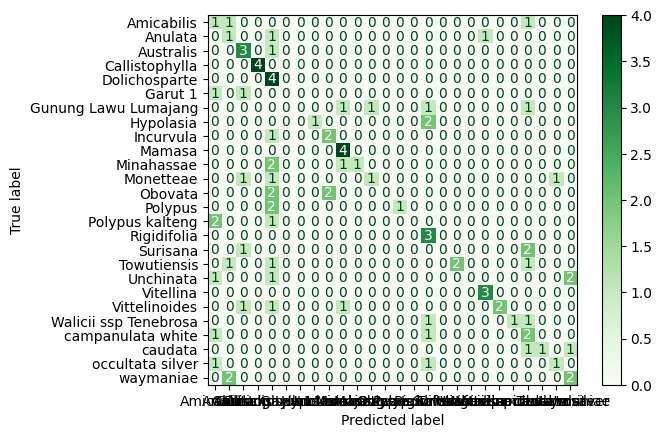

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np




cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_label)

disp.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         0.0       0.14      0.33      0.20         3
         1.0       0.20      0.33      0.25         3
         2.0       0.43      0.75      0.55         4
         3.0       1.00      1.00      1.00         4
         4.0       0.22      1.00      0.36         4
         7.0       1.00      0.33      0.50         3
         8.0       0.50      0.67      0.57         3
         9.0       0.57      1.00      0.73         4
        10.0       1.00      0.25      0.40         4
        11.0       0.50      0.25      0.33         4
        13.0       1.00      0.33      0.50         3
        15.0       0.33      1.00      0.50         3
        17.0       1.00      0.40      0.57         5
        19.0       0.75      1.00      0.86         3
        20.0       1.00      0.40      0.57         5
        21.0       1.00      0.33      0.50         3
        22.0       0.22      0.50      0.31         4
        23.0       1.00    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
